# **Lifetime Clustering (LTC) Demo**

This is a brief demonstration of the LTC algorithm as described in JM Zollner, B Teuscher, W Mansour, and M Werner, ‘Efficient and Robust Topology-Based Clustering’. We present two examples along with the corresponding evaluation metrics and compare LTC with the DBSCAN algorithm. A complete and comprehensive evaluation can be found in the publication. The next cell contains a visualisation of the lifetime clustering process.

<img src="../assets/ltc.gif" width="800"/>

## Examples

We show exemplary results of the LTC algorithm using two synthetic data sets: Flame and Birch1.

In [1]:
#!pip install ltcpy
#!pip install -r requirements.txt

In [2]:
import numpy as np
import time
from ltcpy import LifetimeClustering
from utils import *

### Flame

In [3]:
# Load flame dataset
data = np.loadtxt("../assets/flame.txt")
X = np.asarray(data[:, :-1])
X = normalize_data(X)
y_true = np.asarray(data[:, -1])

In [4]:
# Run LTC
ltc = LifetimeClustering(eps=0.1)
start = time.time()
ltc.fit(X)
end = time.time()
print(f"Runtime: {end - start:.4f} seconds")

Runtime: 0.0013 seconds


In [5]:
# Evaluate result
y_pred = np.asarray(ltc.labels_)
lifetimes = np.asarray(ltc.lifetimes_)
ari, vme, num_clusters = eval_clustering(y_true, y_pred)
print(f"ARI: {ari}, VM: {vme}")

ARI: 0.9550368544212595, VM: 0.8997978366790114


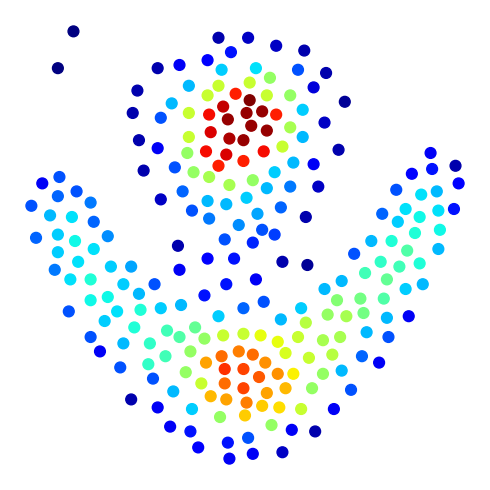

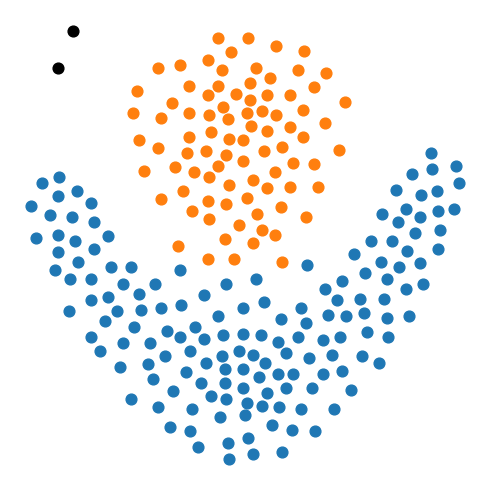

In [6]:
# Plot result
plot_lifetime(X, lifetimes, s=60)
plot_labels(X, y_pred, s=60)

### Birch1

In [7]:
# Load birch1 dataset
data = np.loadtxt("../assets/birch1.txt")
X = np.asarray(data[:, :-1])
X = normalize_data(X)
y_true = np.asarray(data[:, -1])

In [8]:
# Run LTC
ltc = LifetimeClustering(eps=0.03)
start = time.time()
ltc.fit(X)
end = time.time()
print(f"Runtime: {end - start:.4f} seconds")

Runtime: 0.7587 seconds


In [9]:
# Evaluate result
y_pred = np.asarray(ltc.labels_)
lifetimes = np.asarray(ltc.lifetimes_)
ari, vme, num_clusters = eval_clustering(y_true, y_pred)
print(f"ARI: {ari}, V-measure: {vme}, Num clusters: {num_clusters}")

ARI: 0.9816510273476731, V-measure: 0.987563433547693, Num clusters: 100


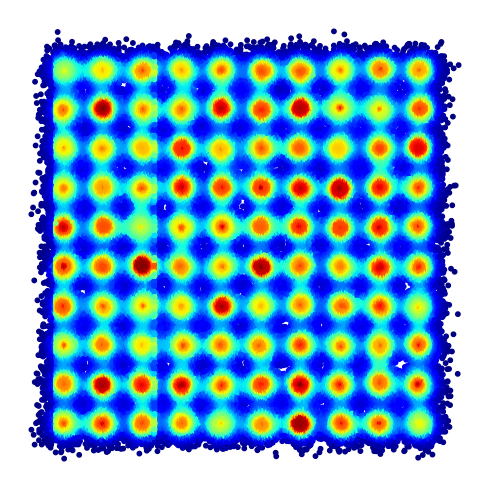

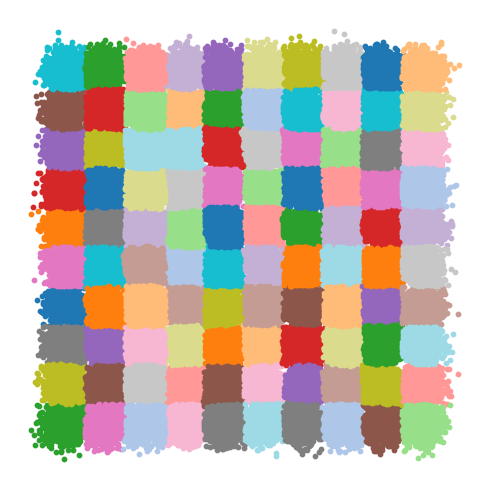

In [10]:
# Plot result
plot_lifetime(X, lifetimes)
plot_labels(X, y_pred)

## Comparison to DBSCAN

We provide a brief comparison with classic density-based clustering. The main challenge lies in selecting an $\epsilon$ that allows all points to be reached without causing distinct clusters to merge. The DBSCAN algorithm uses the min_samples parameter to stop the cluster expansion in low-density regions, but this often results in many points being labeled as noise. In contrast, LTC relies solely on $\epsilon$ and consistently separates clusters without misclassifying large numbers of points as noise.

In [11]:
from matplotlib import pyplot as plt
from sklearn.cluster import DBSCAN

In [12]:
# Generate two blobs dataset
blob_radius = 5
n_points = 10000
noise = 1.5
X, y_true = make_two_blobs(blob_radius, n_points, noise)
X = normalize_data(X)

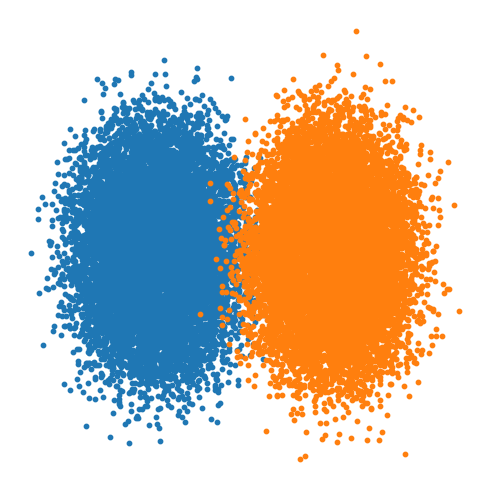

In [13]:
# Plot reference labels
plot_labels(X, y_true)

In [14]:
# Run LTC
ltc = LifetimeClustering(eps=0.1)
start = time.time()
ltc.fit(X)
end = time.time()
print(f"Runtime: {end - start:.4f} seconds")

Runtime: 0.2538 seconds


In [15]:
# Evaluate result
y_pred = np.asarray(ltc.labels_)
lifetimes = np.asarray(ltc.lifetimes_)
ari, vme, num_clusters = eval_clustering(y_true, y_pred)
print(f"ARI: {ari}, VM: {vme}")


ARI: 0.9615744386455385, VM: 0.9213914248886369


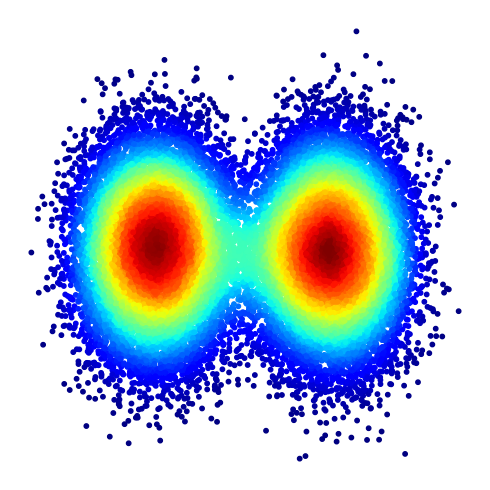

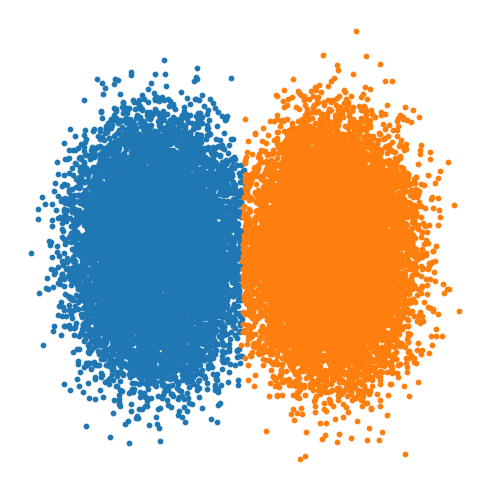

In [16]:
# Plot result
plot_lifetime(X, lifetimes)
plot_labels(X, y_pred)

In [17]:
# Run DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=1500)
start = time.time()
dbscan.fit(X)
end = time.time()
print(f"Runtime: {end - start:.4f} seconds")

Runtime: 0.4504 seconds


In [18]:
# Evaluate result
y_pred_dbscan = dbscan.labels_
ari, vm, num_clusters = eval_clustering(y_true, y_pred_dbscan)
print(f"ARI: {ari}, VM: {vm}")

ARI: 0.8288236285185779, VM: 0.7420989390741749


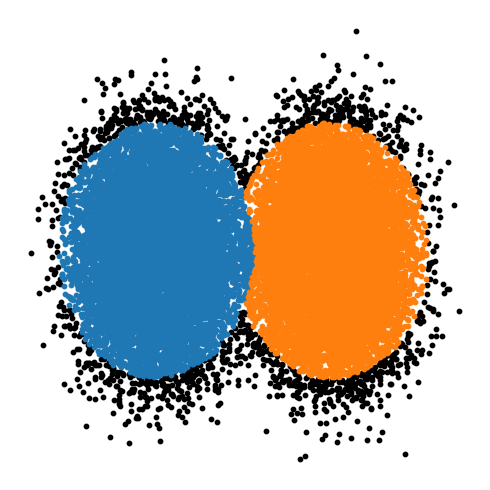

In [19]:
# Plot result
plot_labels(X, y_pred_dbscan)

To give a more comprehensive comparison between LTC and DBSCAN, we vary the noise level in the two blobs dataset and compute the average ARI over 5 runs for each noise level. Try to adapt the parameters of both algorithms and observe the performance.

In [ ]:
# Set parameters
eps_ltc = 0.1
eps_dbscan = 0.1
min_samples_dbscan = 1000
noise_levels = np.arange(0.5, 2.01, 0.25)

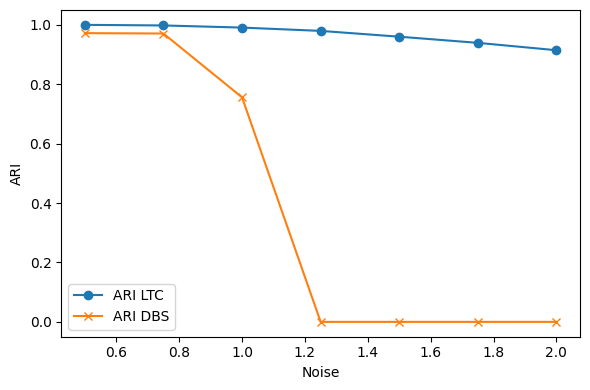

In [ ]:
# Run comparison
dbscan = DBSCAN(eps=eps_dbscan, min_samples=min_samples_dbscan)
ltc = LifetimeClustering(eps=eps_ltc)

ari_ltc_list = []
ari_dbscan_list = []
for noise in noise_levels:
    ari_ltc_mean = 0
    ari_dbscan_mean = 0
    for _ in range(5):
        X, y_true = make_two_blobs(blob_radius, n_points, noise)
        X = normalize_data(X)
        ltc.fit(X)
        dbscan.fit(X)
        ari_ltc, vme_ltc, num_clusters_ltc = eval_clustering(y_true, np.asarray(ltc.labels_))
        ari_dbscan, vme_dbscan, num_clusters_dbscan = eval_clustering(y_true, dbscan.labels_)
        ari_ltc_mean += ari_ltc
        ari_dbscan_mean += ari_dbscan
    ari_ltc_list.append(ari_ltc_mean / 5)
    ari_dbscan_list.append(ari_dbscan_mean / 5)

plt.figure(figsize=(6,4))
plt.plot(noise_levels, ari_ltc_list, marker='o', label="ARI LTC")
plt.plot(noise_levels, ari_dbscan_list, marker='x', label="ARI DBS")
plt.xlabel("Noise")
plt.ylabel("ARI")
plt.legend()
plt.tight_layout()
plt.show()